In [24]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models

In [25]:
# default settings
img_width, img_height = 224, 224

train_dir = 'Polyp_copy/train'
validate_dir = 'Polyp_copy/validation'
nb_classes = len(glob.glob(train_dir + '/*'))
epochs = 50
batch_size = 32

In [26]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

300


In [27]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

100


In [28]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [29]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [30]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 300 images belonging to 2 classes.


In [31]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 100 images belonging to 2 classes.


In [32]:
resnet_model = ResNet50(include_top=False, weights = 'imagenet', input_shape = (img_height, img_width, 3))

In [33]:
for layer in resnet_model.layers:
    layer.trainable = False

In [34]:
x = layers.Flatten()(resnet_model.output)
prediction = layers.Dense(2, activation='softmax')(x)
model2 = Model(inputs = resnet_model.input, outputs=prediction)

In [35]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [36]:
model2.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
r = model2.fit(
 train_generator,
 validation_data=validate_generator,
 epochs=epochs,
)

Epoch 1/50


2022-10-25 02:46:39.356243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 2.9592 - accuracy: 0.5300

2022-10-25 02:46:43.348554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 7s 547ms/step - loss: 2.9592 - accuracy: 0.5300 - val_loss: 1.5437 - val_accuracy: 0.5500
Epoch 2/50
10/10 [==============================] - 4s 438ms/step - loss: 1.2708 - accuracy: 0.5900 - val_loss: 1.0502 - val_accuracy: 0.5000
Epoch 3/50
10/10 [==============================] - 5s 446ms/step - loss: 0.8228 - accuracy: 0.6033 - val_loss: 0.6283 - val_accuracy: 0.6300
Epoch 4/50
10/10 [==============================] - 4s 437ms/step - loss: 0.8690 - accuracy: 0.5800 - val_loss: 0.9910 - val_accuracy: 0.6100
Epoch 5/50
10/10 [==============================] - 5s 443ms/step - loss: 0.8201 - accuracy: 0.5600 - val_loss: 0.6092 - val_accuracy: 0.6800
Epoch 6/50
10/10 [==============================] - 4s 428ms/step - loss: 0.6890 - accuracy: 0.6067 - val_loss: 0.8699 - val_accuracy: 0.6000
Epoch 7/50
10/10 [==============================] - 4s 438ms/step - loss: 0.7249 - accuracy: 0.6633 - val_loss: 0.6687 - val_accuracy: 0.5900
Epoch 8/50
10/10 

In [38]:
# Fine-tuning - only change weights for last layer
fine_tune_at = len(model2.layers) - 1
for layer in model2.layers[:fine_tune_at]:
    layer.trainable = False

In [39]:
model2.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics=['accuracy'])

In [40]:
fine_tune_epochs = 20
total_epochs = epochs + fine_tune_epochs
history_fine = model2.fit(train_generator,
                             epochs=total_epochs,
                             initial_epoch=r.epoch[-1],
                             validation_data=validate_generator)

Epoch 50/70


2022-10-25 02:50:32.093478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 2.1251 - accuracy: 0.5600

2022-10-25 02:50:36.544742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 8s 586ms/step - loss: 2.1251 - accuracy: 0.5600 - val_loss: 1.0087 - val_accuracy: 0.5200
Epoch 51/70
10/10 [==============================] - 4s 435ms/step - loss: 0.6671 - accuracy: 0.6533 - val_loss: 0.6862 - val_accuracy: 0.6700
Epoch 52/70
10/10 [==============================] - 5s 454ms/step - loss: 0.5607 - accuracy: 0.7200 - val_loss: 1.2077 - val_accuracy: 0.6300
Epoch 53/70
10/10 [==============================] - 5s 451ms/step - loss: 0.7921 - accuracy: 0.6533 - val_loss: 0.5440 - val_accuracy: 0.7300
Epoch 54/70
10/10 [==============================] - 5s 461ms/step - loss: 0.7105 - accuracy: 0.6400 - val_loss: 0.5540 - val_accuracy: 0.6900
Epoch 55/70
10/10 [==============================] - 5s 457ms/step - loss: 0.6613 - accuracy: 0.6767 - val_loss: 0.8443 - val_accuracy: 0.5300
Epoch 56/70
10/10 [==============================] - 5s 454ms/step - loss: 0.6012 - accuracy: 0.6733 - val_loss: 0.5260 - val_accuracy: 0.7100
Epoch 57/70

In [41]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']


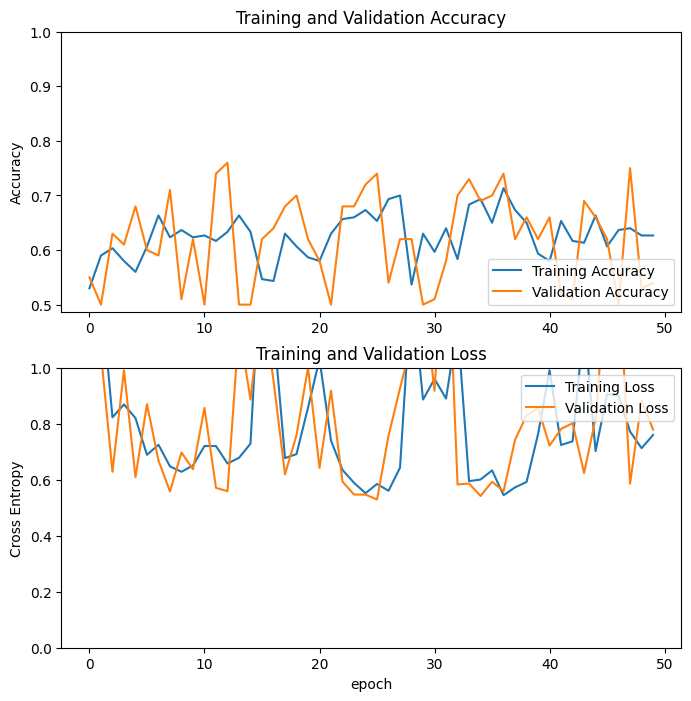

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [43]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


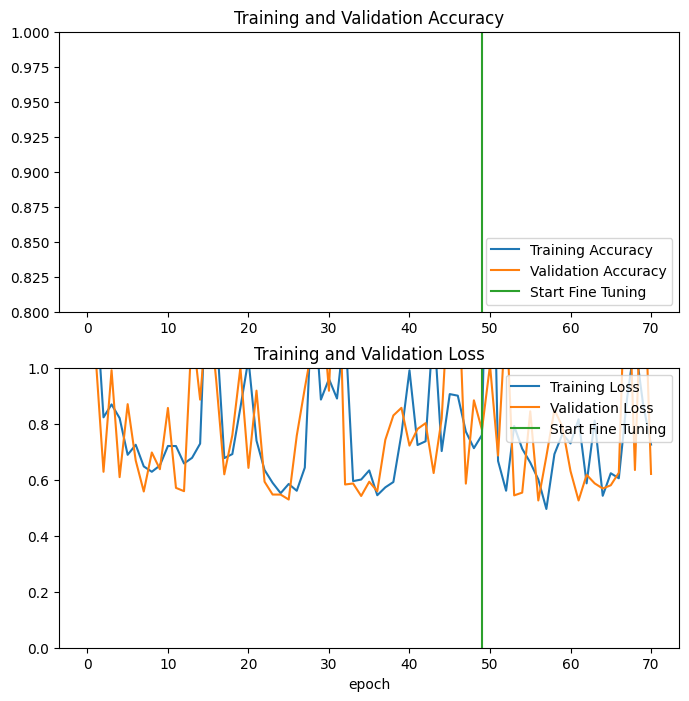

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1,epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([epochs-1,epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [45]:
loss, accuracy = model2.evaluate(validate_generator)
print('Test accuracy :', accuracy)

4/4 [==============================] - 1s 227ms/step - loss: 0.6063 - accuracy: 0.7300
Test accuracy : 0.7299999594688416
